In [1]:
import pandas as pd
from collections import Counter
from sklearn.mixture import GaussianMixture as gmm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from imblearn.pipeline import Pipeline
from scipy import linalg
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FactorAnalysis
from scipy.stats import kurtosis



     length    weight     count    looped  neighbors    income  class
0 -0.288367  0.219927 -0.396907 -0.246819  -0.011525 -0.027174    0.0
[-9.66701769e-01  1.06213418e+05  9.42353671e+00  3.72327525e+01
  1.87856559e+05  6.46306740e+04]


/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


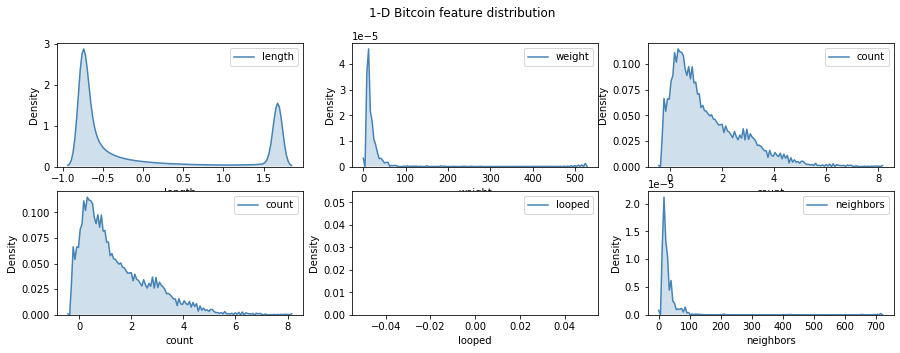

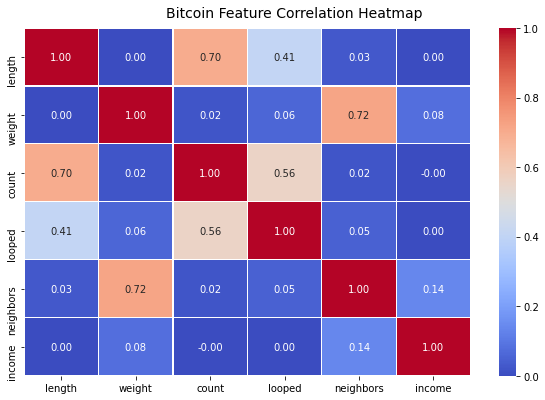

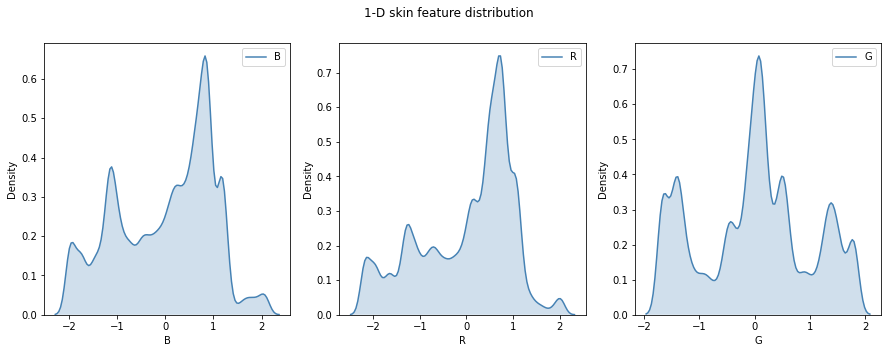

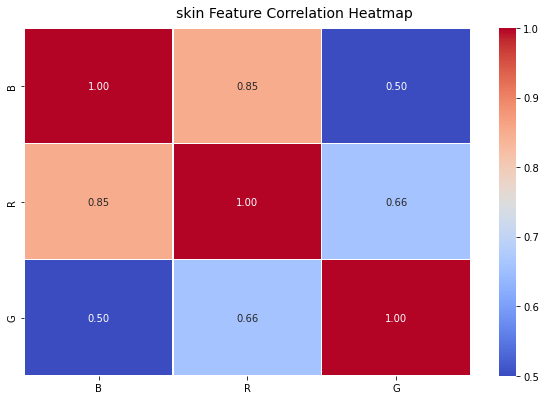

In [56]:
########import bitcoin datasets and plot feature distribution#######
#extract the data
bitcoin_train_df = pd.read_csv("bitcoin_train.txt", delimiter='\t')
print(bitcoin_train_df.head(1))
# bitcoin_test_df = pd.read_csv("bitcoin_test.txt")
skin_train_df = pd.read_csv("skin_train.txt",delimiter='\t')
# skin_test_df = pd.read_csv("skin_test.txt")/

X_bitcoin_train=np.array(bitcoin_train_df.iloc[:,:-1])
y_bitcoin_train = np.array(bitcoin_train_df['class'])
# X_bitcoin_test=np.array(bitcoin_test_df[:,:-1])
# y_bitcoin_test = np.array(bitcoin_test_df[:,-1])

X_skin_train=np.array(skin_train_df.iloc[:,:-1])
y_skin_train = np.array(skin_train_df['class'])
# X_skin_test=np.array(skin_test_df[:,:-1])
# y_skin_test = np.array(skin_test_df[:,-1])

bitcoin_feature_number=6
skin_feature_number=3
print(kurtosis(X_bitcoin_train,fisher=True))
# #plot the bitcoin feature distribution

###1-d feature distribution#####
# Density Plot
bitcoin_feature_number=6
bitcoin_feature_names = bitcoin_train_df.columns[:-1]
fig_1,axs = plt.subplots(2,3,figsize=(15, 5), sharey=False)
for i in range(2):
    for j in range(3):
        axs[i][j].set_xlabel(bitcoin_train_df.columns[i*2+j])
        axs[i][j].set_ylabel("Density") 
        sns.kdeplot(bitcoin_train_df[bitcoin_feature_names[i*2+j]], ax=axs[i][j], shade=True, color='steelblue')
fig_1.suptitle("1-D Bitcoin feature distribution")    

fig_1.savefig("1-D Bitcoin Feature Distribution.png")
####2-d feature correlation matrix#####
f, ax = plt.subplots(figsize=(10, 6))
corr = bitcoin_train_df[bitcoin_feature_names].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bitcoin Feature Correlation Heatmap', fontsize=14)
f.savefig("Bitcoin Feature Correlation Heatmap.png")

###plot skin feature distribution

###1-d feature distribution#####
# Density Plot
skin_feature_number=3
skin_feature_names = skin_train_df.columns[:-1]
fig_1,axs = plt.subplots(1,3,figsize=(15, 5), sharey=False)

for j in range(3):
    axs[j].set_xlabel(skin_train_df.columns[j])
    axs[j].set_ylabel("Density") 
    sns.kdeplot(skin_train_df[skin_train_df.columns[j]], ax=axs[j], shade=True, color='steelblue')
fig_1.suptitle("1-D skin feature distribution")    

fig_1.savefig("1-D skin Feature Distribution.png")
####2-d feature correlation matrix#####
f, ax = plt.subplots(figsize=(10, 6))
corr = skin_train_df[skin_feature_names].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('skin Feature Correlation Heatmap', fontsize=14)
f.savefig("skin Feature Correlation Heatmap.png")





In [63]:
Counter(y_skin_train)

Counter({1.0: 43653, 0.0: 166395})

In [53]:
print(bitcoin_feature_names)

Index(['length', 'weight', 'count', 'looped', 'neighbors', 'income'], dtype='object')


In [ ]:
print(X_bitcoin_train.shape,X_skin_train.shape)

In [ ]:
############Dimension Deduction on bitcoin data###########

###########PCA#####

#######compute the eigenvalue(explained_variance_ratio) and reconstruction_error with different components
reconstruction_error = []
for k in range(1,bitcoin_feature_number+1):
    pca = PCA(n_components=k, svd_solver='full')
    X_new = pca.fit_transform(X_bitcoin_train)
    project_matrix = pca.components_.T
    print(k,project_matrix.shape)
#     project_matrix_add = np.concatenate((project_matrix,np.random.rand(bitcoin_feature_number,bitcoin_feature_number-k)),axis=1)
#     inverse_project_matrix=np.linalg.inv(project_matrix_add)
#     print(X_new.shape,inverse_project_matrix.shape)
#     print(np.concatenate((np.matmul(X_new,inverse_project_matrix),np.zeros((X_new.shape[0],bitcoin_feature_number-k))),axis=1))
    difference = X_bitcoin_train-np.matmul(X_new,project_matrix.T)
    reconstruction_error.append(np.nanmean(np.square(difference)))
# print(np.matmul(Eigen_vector,Eigen_vector.T))
    
print("PCA finished")    
fig_3,axs = plt.subplots(1,2,figsize=(10, 5), sharey=False)
axs[0].bar(range(1,bitcoin_feature_number+1),pca.explained_variance_ratio_,color = "b",label='explained_variance_ratio')
axs[1].plot(range(1,bitcoin_feature_number+1),reconstruction_error,'r^',linestyle='solid',label='reconstruction error')
axs[0].set_xlabel("n_component")
axs[0].set_ylabel("explained_variance_ratio")
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('reconstruction errors')
axs[1].legend()
fig_3.suptitle("Fig2.1:PCA on bitcoin data")
fig_3.savefig("Fig2.1:PCA on bitcoin data.png")

# ########ICA############

#######compute the kurtosis and reconstruction_error with different components
ica=FastICA(n_components=bitcoin_feature_number)
X_new= ica.fit_transform(X_bitcoin_train)
kur = kurtosis(X_new,fisher=True)
reconstruction_error = []
for k in range(1,bitcoin_feature_number+1):
    temp_error=0
    print(k)
    for iteration in range(20):
        ica = FastICA(n_components = k)
        X_new = ica.fit_transform(X_bitcoin_train)
        temp_error += np.nanmean(np.square(X_bitcoin_train-np.matmul(X_new,ica.mixing_.T)))
    reconstruction_error.append(temp_error/20)

fig_4,axs = plt.subplots(1,2,figsize=(10, 5), sharey=False)
axs[0].bar(range(1,bitcoin_feature_number+1),kur,color = "b",label="Kurtosis")
axs[1].plot(range(1,bitcoin_feature_number+1),reconstruction_error,'r^',linestyle='solid',label='reconstruction_error')
axs[0].set_xlabel("n_component")
axs[0].set_ylabel("Kurtosis")
axs[0].set_ylim(kur.min(),kur.max()+10000)
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('reconstruction errors')
axs[1].legend()
fig_4.suptitle("Fig2.2:ICA on bitcoin data")
fig_4.savefig("Fig2.2:ICA on bitcoin data.png")
print("ICA finished")
# ###########RCA##########
# ######how the average variance go with repeat times######
grp = GaussianRandomProjection(n_components=bitcoin_feature_number)
X_new = grp.fit_transform(X_bitcoin_train)
kur = kurtosis(X_new,fisher=True)
iteration=20
reconstruction_error = []
for k in range(1,bitcoin_feature_number+1):
    temp_error = 0
    for _ in range(iteration):
        grp = GaussianRandomProjection(n_components=k)
        X_new = grp.fit_transform(X_bitcoin_train)
        project_matrix = grp.components_.T
        print(project_matrix.shape)
        print(X_new.shape)
        X_new_add = np.concatenate((X_new,np.zeros((X_new.shape[0],bitcoin_feature_number-k))),axis=1)
        inverse_project_matrix=np.linalg.inv(np.concatenate((project_matrix,np.random.normal(0, 1/k, size=(bitcoin_feature_number,bitcoin_feature_number-k))),axis=1))
        difference = X_bitcoin_train-np.matmul(X_new_add,inverse_project_matrix)
        temp_error += np.nanmean(np.square(difference))
    reconstruction_error.append(temp_error/10)

variance_with_repeat = []
iteration_grp=10
X_bitcoin_train_copy = X_bitcoin_train
X_bitcoin_train_variance = np.sum(np.var(X_bitcoin_train))/bitcoin_feature_number
for _ in range(iteration_grp):
    grp = GaussianRandomProjection(n_components=bitcoin_feature_number)
    X_new = grp.fit_transform(X_bitcoin_train_copy)
    variance_with_repeat.append((np.sum(np.var(X_new))/bitcoin_feature_number)-X_bitcoin_train_variance)
    X_bitcoin_train_copy = X_new
kur = kurtosis(X_bitcoin_train_copy,fisher=True)
fig_5,axs = plt.subplots(1,3,figsize=(15,5),sharey=False)
axs[0].plot(range(1,bitcoin_feature_number+1),reconstruction_error,'b^',linestyle='solid',label="reconstruction error")
axs[1].bar(range(1,bitcoin_feature_number+1),kur,color='r',label='Kurtosis_new_feature')
axs[1].bar(range(1,bitcoin_feature_number+1),kurtosis(X_bitcoin_train,fisher=True),color='b',label='Kurtosis_original_feature')
axs[2].plot(range(1,iteration_grp+1),variance_with_repeat,'y',linestyle='solid',label='variance_by_iteration')
axs[0].set_xlabel("n_component")
axs[0].set_ylabel("reconstruction errors")
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('Kurtosis')
axs[1].legend()                               
axs[2].set_xlabel("iteration")
axs[2].set_ylabel('variance')
axs[2].legend()
fig_5.suptitle("Fig2.3:RCA on bitcoin data")
fig_5.savefig("Fig2.3:RCA on bitcoin data.png")          
print("grp finished")

####FA
####FA
fa = FactorAnalysis(n_components=bitcoin_feature_number, random_state=0)
X_new = fa.fit_transform(X_bitcoin_train)
X_new_variance=[np.var(i) for i in X_new.T]
print(X_new_variance)
# kur = kurtosis(X_new,fisher=True)
noise_variance=fa.noise_variance_
for i in range(bitcoin_feature_number):
    if X_new_variance[i] == 0.0:
        rank_X_new = i
        break

X_new = X_new[:,:rank_X_new]
print(X_new.shape)
Project_matrix = fa.components_[:rank_X_new,:].T
print(Project_matrix.shape)
reconstruction_error = []
for k in range(1,bitcoin_feature_number+1):
    project_matrix = Project_matrix
    if k >= rank_X_new:
        x_new = X_new[:,:rank_X_new]
        project_matrix=Project_matrix
        x_new_add = np.concatenate((x_new,np.zeros((x_new.shape[0],bitcoin_feature_number-rank_X_new))),axis=1)
        inverse_project_matrix=np.linalg.inv(np.concatenate((project_matrix,np.random.rand(bitcoin_feature_number,bitcoin_feature_number-rank_X_new)),axis=1))     
    else:
        x_new = X_new[:,:k]
        project_matrix = Project_matrix[:,:k]
        if k == 1:
            x_new = x_new.reshape(-1,1)
            project_matrix = project_matrix.reshape(-1,1)

        print(project_matrix.shape)
        x_new_add = np.concatenate((x_new,np.zeros((x_new.shape[0],bitcoin_feature_number-k))),axis=1)
        inverse_project_matrix=np.linalg.inv(np.concatenate((project_matrix,np.random.rand(bitcoin_feature_number,bitcoin_feature_number-k)),axis=1))
    
    difference = X_bitcoin_train-np.matmul(x_new_add,inverse_project_matrix)
    reconstruction_error.append(np.nanmean(np.square(difference)))
fig_6,axs = plt.subplots(1,2,figsize=(10, 5), sharey=False)
axs[0].bar(range(1,bitcoin_feature_number+1),X_new_variance,color='b',label='common variance of new feature')
axs[0].plot(range(1,bitcoin_feature_number+1),noise_variance,color='r',label='Noise variance in new feature')
axs[1].plot(range(1,bitcoin_feature_number+1),reconstruction_error,'r^',linestyle='solid',label='reconstruction error')
# axs[2].bar(range(1,bitcoin_feature_number+1),kur,color='y',label='Kurtosis')
axs[0].set_xlabel("n_component")
axs[0].set_ylabel("variance")
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('reconstruction errors')
axs[1].legend()
# axs[2].set_xlabel("n_component")
# axs[2].set_ylabel("Kurtosis")
# axs[2].legend()
fig_6.suptitle("Fig2.4:FA on bitcoin data")
fig_6.savefig("Fig2.4:FA on bitcoin data.png")
print("FA finished")

1 (3, 1)
2 (3, 2)
3 (3, 3)
(3, 1)
(210048, 1)
(3, 2)
(210048, 2)
(3, 3)
(210048, 3)
[0.7737547484996232, 0.0, 0.0]
(210048, 1)
(3, 1)


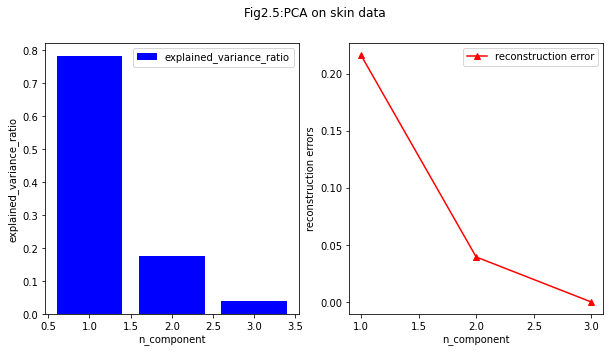

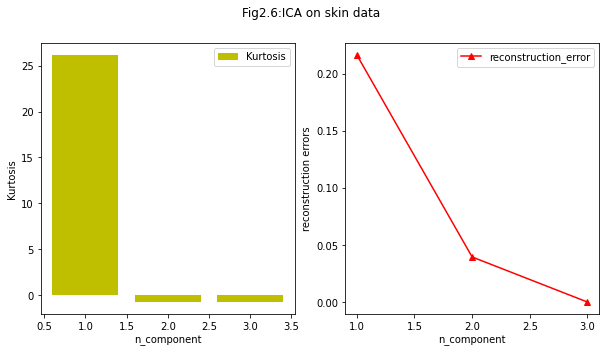

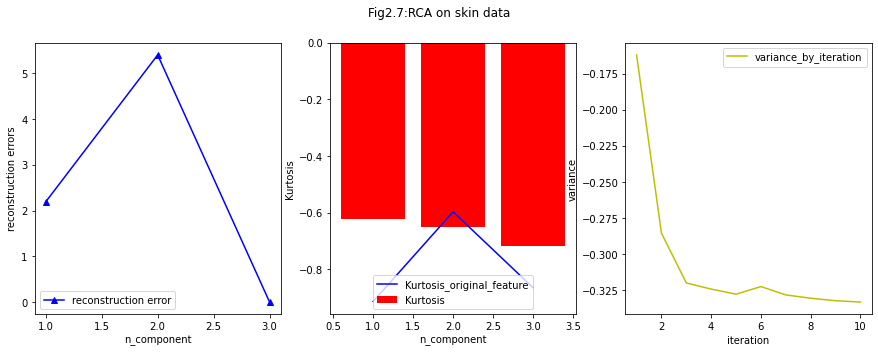

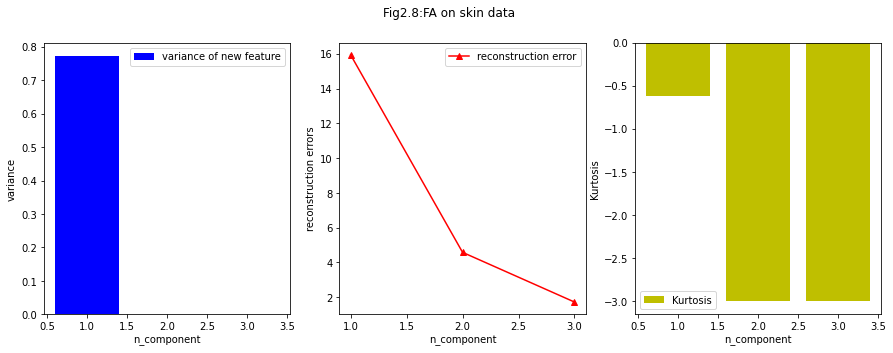

In [5]:
############Dimension Deduction on skin data###########

###########PCA#####

#######compute the eigenvalue(explained_variance_ratio) and reconstruction_error with different components
fig_3,axs = plt.subplots(1,2,figsize=(10, 5), sharey=False)
reconstruction_error = []
for k in range(1,skin_feature_number+1):
    pca = PCA(n_components=k, svd_solver='full')
    X_new = pca.fit_transform(X_skin_train)

    project_matrix = pca.components_.T
    print(k,project_matrix.shape)
#     project_matrix_add = np.concatenate((project_matrix,np.random.rand(bitcoin_feature_number,bitcoin_feature_number-k)),axis=1)
#     inverse_project_matrix=np.linalg.inv(project_matrix_add)
#     print(X_new.shape,inverse_project_matrix.shape)
#     print(np.concatenate((np.matmul(X_new,inverse_project_matrix),np.zeros((X_new.shape[0],bitcoin_feature_number-k))),axis=1))
    difference = X_skin_train-np.matmul(X_new,project_matrix.T)
    reconstruction_error.append(np.nanmean(np.square(difference)))
# print(np.matmul(Eigen_vector,Eigen_vector.T))
    
        
axs[0].bar(range(1,skin_feature_number+1),pca.explained_variance_ratio_,color = "b",label='explained_variance_ratio')
axs[1].plot(range(1,skin_feature_number+1),reconstruction_error,'r^',linestyle='solid',label='reconstruction error')
axs[0].set_xlabel("n_component")
axs[0].set_ylabel("explained_variance_ratio")
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('reconstruction errors')
axs[1].legend()
fig_3.suptitle("Fig2.5:PCA on skin data")
fig_3.savefig("Fig2.5:PCA on skin data.png")





##########ICA############

#######compute the kurtosis and reconstruction_error with different components
ica=FastICA(n_components=skin_feature_number,random_state=0)
X_new= ica.fit_transform(X_skin_train)
kur = kurtosis(X_new,fisher=True)
reconstruction_error = []
for k in range(1,skin_feature_number+1):
    temp_error=0
    for iteration in range(20):
        ica = FastICA(n_components = k)
        X_new = ica.fit_transform(X_skin_train)
        temp_error += np.nanmean(np.square(X_skin_train-np.matmul(X_new,ica.mixing_.T)))
    reconstruction_error.append(temp_error/20)

fig_4,axs = plt.subplots(1,2,figsize=(10, 5), sharey=False)
axs[0].bar(range(1,skin_feature_number+1),kur,color = "y",label="Kurtosis")
axs[1].plot(range(1,skin_feature_number+1),reconstruction_error,'r^',linestyle='solid',label='reconstruction_error')
axs[0].set_xlabel("n_component")
axs[0].set_ylabel("Kurtosis")
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('reconstruction errors')
axs[1].legend()
fig_4.suptitle("Fig2.6:ICA on skin data")
fig_4.savefig("Fig2.6:ICA on skin data.png")

###########RCA##########
######how the average variance go with repeat times######
grp = GaussianRandomProjection(n_components=skin_feature_number)
X_new = grp.fit_transform(X_skin_train)
kur = kurtosis(X_new,fisher=True)

reconstruction_error = []
for k in range(1,skin_feature_number+1):
    grp = GaussianRandomProjection(n_components=k)
    X_new = grp.fit_transform(X_skin_train)
    project_matrix = grp.components_.T
    print(project_matrix.shape)
    print(X_new.shape)
    X_new_add = np.concatenate((X_new,np.random.rand(X_new.shape[0],skin_feature_number-k)),axis=1)
    inverse_project_matrix=np.linalg.inv(np.concatenate((project_matrix,np.random.normal(0, 1/k, size=(skin_feature_number,skin_feature_number-k))),axis=1))
    difference = X_skin_train-np.matmul(X_new_add,inverse_project_matrix)
    reconstruction_error.append(np.nanmean(np.square(difference)))

variance_with_repeat = []
iteration_grp=10
X_skin_train_copy = X_skin_train
X_skin_train_variance = np.sum(np.var(X_skin_train))/skin_feature_number
for _ in range(iteration_grp):
    grp = GaussianRandomProjection(n_components=skin_feature_number)
    X_new = grp.fit_transform(X_skin_train_copy)
    variance_with_repeat.append((np.sum(np.var(X_new))/skin_feature_number)-X_skin_train_variance)
    X_skin_train_copy = X_new

fig_5,axs = plt.subplots(1,3,figsize=(15,5),sharey=False)
axs[0].plot(range(1,skin_feature_number+1),reconstruction_error,'b^',linestyle='solid',label="reconstruction error")
axs[1].bar(range(1,skin_feature_number+1),kur,color='r',label='Kurtosis')
axs[1].plot(range(1,skin_feature_number+1),kurtosis(X_skin_train,fisher=True),color='b',linestyle='solid',label='Kurtosis_original_feature')
axs[2].plot(range(1,iteration_grp+1),variance_with_repeat,'y',linestyle='solid',label='variance_by_iteration')

axs[0].set_xlabel("n_component")
axs[0].set_ylabel("reconstruction errors")
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('Kurtosis')
axs[1].legend()                               
axs[2].set_xlabel("iteration")
axs[2].set_ylabel('variance')
axs[2].legend()
fig_5.suptitle("Fig2.7:RCA on skin data")
fig_5.savefig("Fig2.7:RCA on skin data.png")          
        
    

fa = FactorAnalysis(n_components=skin_feature_number, random_state=0)
X_new = fa.fit_transform(X_skin_train)
print(X_new[:100,1])
X_new_variance = [np.var(i) for i in X_new.T]
print(X_new_variance)
noise_variance = fa.noise_variance_
print(noise_variance)
# kur = kurtosis(X_new,fisher=True)
for i in range(bitcoin_feature_number):
    if X_new_variance[i] == 0.0:
        rank_X_new = i
        break

X_new = X_new[:,:rank_X_new]
print(X_new.shape)
Project_matrix = fa.components_[:rank_X_new,:].T
print(Project_matrix.shape)
reconstruction_error = []
for k in range(1,skin_feature_number+1):
    project_matrix = Project_matrix
    if k >= rank_X_new:
        x_new = X_new[:,:rank_X_new]
        project_matrix=Project_matrix
        x_new_add = np.concatenate((x_new,np.zeros((x_new.shape[0],skin_feature_number-rank_X_new))),axis=1)
        inverse_project_matrix=np.linalg.inv(np.concatenate((project_matrix,np.random.rand(skin_feature_number,skin_feature_number-rank_X_new)),axis=1))     
    else:
        x_new = X_new[:,:k]
        project_matrix = Project_matrix[:,:k]
        if k == 1:
            x_new = x_new.reshape(-1,1)
            project_matrix = project_matrix.reshape(-1,1)

        print(project_matrix.shape)
        x_new_add = np.concatenate((x_new,np.zeros((x_new.shape[0],skin_feature_number-k))),axis=1)
        inverse_project_matrix=np.linalg.inv(np.concatenate((project_matrix,np.random.rand(skin_feature_number,skin_feature_number-k)),axis=1))
    
    difference = X_skin_train-np.matmul(x_new_add,inverse_project_matrix)
    reconstruction_error.append(np.nanmean(np.square(difference)))
fig_6,axs = plt.subplots(1,2,figsize=(10, 5), sharey=False)
axs[0].bar(range(1,skin_feature_number+1),X_new_variance,color='b',label='common variance in new feature')
axs[0].plot(range(1,skin_feature_number+1),noise_variance,color='r',label='Noise variance in new feature')
axs[1].plot(range(1,skin_feature_number+1),reconstruction_error,'r^',linestyle='solid',label='reconstruction error')
# axs[2].bar(range(1,skin_feature_number+1),kur,color='y',label='Kurtosis')
axs[0].set_xlabel("n_component")
axs[0].set_ylabel("variance")
axs[0].legend()
axs[1].set_xlabel("n_component")
axs[1].set_ylabel('reconstruction errors')
axs[1].legend()
# axs[2].set_xlabel("n_component")
# axs[2].set_ylabel("Kurtosis")
# axs[2].legend()
fig_6.suptitle("Fig2.8:FA on skin data")
fig_6.savefig("Fig2.8:FA on skin data.png")

In [ ]:
X_new

In [14]:
###########reduced bitcoin data
bitcoin_test_df = pd.read_csv("bitcoin_test.txt",delimiter='\t')
X_bitcoin_test=np.array(bitcoin_test_df.iloc[:,:-1])
y_bitcoin_test = np.array(bitcoin_test_df['class'])

#######PCA best n_component=4 for bitcoin#######
pca = PCA(n_components=4, svd_solver='full')
pca.fit(X_bitcoin_train)
X_bitcoin_train_pca = pca.transform(X_bitcoin_train)
X_bitcoin_test_pca = pca.transform(X_bitcoin_test)
X_bitcoin_train_pca_matrix = np.concatenate((X_bitcoin_train_pca,y_bitcoin_train.reshape(-1,1)),axis=1)
X_bitcoin_test_pca_matrix= np.concatenate((X_bitcoin_test_pca,y_bitcoin_test.reshape(-1,1)),axis=1)
X_bitcoin_train_pca_reduced_df = pd.DataFrame(X_bitcoin_train_pca_matrix)
X_bitcoin_test_pca_reduced_df = pd.DataFrame(X_bitcoin_test_pca_matrix)
X_bitcoin_train_pca_reduced_df.to_csv(r'bitcoin_train_pca_reduced.txt',sep='\t', mode='a')
X_bitcoin_test_pca_reduced_df.to_csv(r'bitcoin_test_pca_reduced.txt',sep='\t', mode='a')


#ICA best n_component=3 for bitcoin######
ica=FastICA(n_components=3,random_state=0)
ica.fit(X_bitcoin_train)
X_bitcoin_train_ica = ica.transform(X_bitcoin_train)
X_bitcoin_test_ica = ica.transform(X_bitcoin_test)
X_bitcoin_train_ica_matrix = np.concatenate((X_bitcoin_train_ica,y_bitcoin_train.reshape(-1,1)),axis=1)
X_bitcoin_test_ica_matrix= np.concatenate((X_bitcoin_test_ica,y_bitcoin_test.reshape(-1,1)),axis=1)
X_bitcoin_train_ica_reduced_df = pd.DataFrame(X_bitcoin_train_ica_matrix)
X_bitcoin_test_ica_reduced_df = pd.DataFrame(X_bitcoin_test_ica_matrix)
X_bitcoin_train_ica_reduced_df.to_csv(r'bitcoin_train_ica_reduced.txt',sep='\t', mode='a')
X_bitcoin_test_ica_reduced_df.to_csv(r'bitcoin_test_ica_reduced.txt',sep='\t', mode='a')
# ####RCA best n_component=3 for bitcoin#####
grp = GaussianRandomProjection(n_components=3)
grp.fit(X_bitcoin_train)
X_bitcoin_train_grp = grp.transform(X_bitcoin_train)
X_bitcoin_test_grp= grp.transform(X_bitcoin_test)
X_bitcoin_train_grp_matrix = np.concatenate((X_bitcoin_train_grp,y_bitcoin_train.reshape(-1,1)),axis=1)
X_bitcoin_test_grp_matrix= np.concatenate((X_bitcoin_test_grp,y_bitcoin_test.reshape(-1,1)),axis=1)
X_bitcoin_train_grp_reduced_df = pd.DataFrame(X_bitcoin_train_grp_matrix)
X_bitcoin_test_grp_reduced_df = pd.DataFrame(X_bitcoin_test_grp_matrix)
X_bitcoin_train_grp_reduced_df.to_csv(r'bitcoin_train_grp_reduced.txt',sep='\t', mode='a')
X_bitcoin_test_grp_reduced_df.to_csv(r'bitcoin_test_grp_reduced.txt',sep='\t', mode='a')
# ####FA best n_components=3 for bitcoin#####
fa = FactorAnalysis(n_components=6, random_state=0)
fa.fit(X_bitcoin_train)
X_bitcoin_train_fa = fa.transform(X_bitcoin_train)[:,:3]
X_bitcoin_test_fa = fa.transform(X_bitcoin_test)[:,:3]
X_bitcoin_train_fa_matrix = np.concatenate((X_bitcoin_train_fa,y_bitcoin_train.reshape(-1,1)),axis=1)
X_bitcoin_test_fa_matrix= np.concatenate((X_bitcoin_test_fa,y_bitcoin_test.reshape(-1,1)),axis=1)
X_bitcoin_train_fa_reduced_df = pd.DataFrame(X_bitcoin_train_fa_matrix)
X_bitcoin_test_fa_reduced_df = pd.DataFrame(X_bitcoin_test_fa_matrix)
X_bitcoin_train_fa_reduced_df.to_csv(r'bitcoin_train_fa_reduced.txt',sep='\t', mode='a')
X_bitcoin_test_fa_reduced_df.to_csv(r'bitcoin_test_fa_reduced.txt',sep='\t', mode='a')



/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/decomposition/_factor_analysis.py:243: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


In [15]:
##########reduced skin data
skin_test_df = pd.read_csv("skin_test.txt",delimiter='\t')
X_skin_test = np.array(skin_test_df.iloc[:,:-1])
y_skin_test = np.array(skin_test_df['class'])
# #######PCA best n_component=2 for skin#######
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_skin_train)
X_skin_train_pca = pca.transform(X_skin_train)
X_skin_test_pca = pca.transform(X_skin_test)
X_skin_train_pca_matrix = np.concatenate((X_skin_train_pca,y_skin_train.reshape(-1,1)),axis=1)
X_skin_test_pca_matrix= np.concatenate((X_skin_test_pca,y_skin_test.reshape(-1,1)),axis=1)
X_skin_train_pca_reduced_df = pd.DataFrame(X_skin_train_pca_matrix)
X_skin_test_pca_reduced_df = pd.DataFrame(X_skin_test_pca_matrix)
X_skin_train_pca_reduced_df.to_csv(r'skin_train_pca_reduced.txt',sep='\t', mode='a')
X_skin_test_pca_reduced_df.to_csv(r'skin_test_pca_reduced.txt',sep='\t', mode='a')

# #ICA best n_component=2 for skin######
ica=FastICA(n_components=2,random_state=0)
ica.fit(X_skin_train)
X_skin_train_ica = ica.transform(X_skin_train)
X_skin_test_ica = ica.transform(X_skin_test)
X_skin_train_ica_matrix = np.concatenate((X_skin_train_ica,y_skin_train.reshape(-1,1)),axis=1)
X_skin_test_ica_matrix= np.concatenate((X_skin_test_ica,y_skin_test.reshape(-1,1)),axis=1)
X_skin_train_ica_reduced_df = pd.DataFrame(X_skin_train_ica_matrix)
X_skin_test_ica_reduced_df = pd.DataFrame(X_skin_test_ica_matrix)
X_skin_train_ica_reduced_df.to_csv(r'skin_train_ica_reduced.txt',sep='\t', mode='a')
X_skin_test_ica_reduced_df.to_csv(r'skin_test_ica_reduced.txt',sep='\t', mode='a')
# ####RCA best n_component=k for skin#####
grp = GaussianRandomProjection(n_components=3)
grp.fit(X_skin_train)
X_skin_train_grp = grp.transform(X_skin_train)
X_skin_test_grp = grp.transform(X_skin_test)
X_skin_train_grp_matrix = np.concatenate((X_skin_train_grp,y_skin_train.reshape(-1,1)),axis=1)
X_skin_test_grp_matrix= np.concatenate((X_skin_test_grp,y_skin_test.reshape(-1,1)),axis=1)
X_skin_train_grp_reduced_df = pd.DataFrame(X_skin_train_grp_matrix)
X_skin_test_grp_reduced_df = pd.DataFrame(X_skin_test_grp_matrix)
X_skin_train_grp_reduced_df.to_csv(r'skin_train_grp_reduced.txt',sep='\t', mode='a')
X_skin_test_grp_reduced_df.to_csv(r'skin_test_grp_reduced.txt',sep='\t', mode='a')

# ####FA best n_components=1 for skin#####
fa = FactorAnalysis(n_components=3, random_state=0)
fa.fit(X_skin_train)
X_skin_train_fa = fa.fit_transform(X_skin_train)[:,:1]
X_skin_test_fa = fa.transform(X_skin_test)[:,:1]
X_skin_train_fa_matrix = np.concatenate((X_skin_train_fa,y_skin_train.reshape(-1,1)),axis=1)
X_skin_test_fa_matrix= np.concatenate((X_skin_test_fa,y_skin_test.reshape(-1,1)),axis=1)
X_skin_train_fa_reduced_df = pd.DataFrame(X_skin_train_fa_matrix)
X_skin_test_fa_reduced_df = pd.DataFrame(X_skin_test_fa_matrix)
X_skin_train_fa_reduced_df.to_csv(r'skin_train_fa_reduced.txt',sep='\t', mode='a')
X_skin_test_fa_reduced_df.to_csv(r'skin_test_fa_reduced.txt',sep='\t', mode='a')




/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/decomposition/_factor_analysis.py:243: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)
/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/sklearn/decomposition/_factor_analysis.py:243: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  ConvergenceWarning)


In [58]:
grp = GaussianRandomProjection(n_components=3)
grp.fit(X_skin_train)
X_skin_train_grp = grp.transform(X_skin_train)
X_skin_test_grp = grp.transform(X_skin_test)
X_skin_train_grp_matrix = np.concatenate((X_skin_train_grp,y_skin_train.reshape(-1,1)),axis=1)
X_skin_test_grp_matrix= np.concatenate((X_skin_test_grp,y_skin_test.reshape(-1,1)),axis=1)
X_skin_train_grp_reduced_df = pd.DataFrame(X_skin_train_grp_matrix)
X_skin_test_grp_reduced_df = pd.DataFrame(X_skin_test_grp_matrix)
X_skin_train_grp_reduced_df.to_csv(r'skin_train_grp_reduced.txt',sep='\t', mode='a')
X_skin_test_grp_reduced_df.to_csv(r'skin_test_grp_reduced.txt',sep='\t', mode='a')

In [59]:
grp = GaussianRandomProjection(n_components=3)
grp.fit(X_bitcoin_train)
X_bitcoin_train_grp = grp.transform(X_bitcoin_train)
X_bitcoin_test_grp= grp.transform(X_bitcoin_test)
X_bitcoin_train_grp_matrix = np.concatenate((X_bitcoin_train_grp,y_bitcoin_train.reshape(-1,1)),axis=1)
X_bitcoin_test_grp_matrix= np.concatenate((X_bitcoin_test_grp,y_bitcoin_test.reshape(-1,1)),axis=1)
X_bitcoin_train_grp_reduced_df = pd.DataFrame(X_bitcoin_train_grp_matrix)
X_bitcoin_test_grp_reduced_df = pd.DataFrame(X_bitcoin_test_grp_matrix)
X_bitcoin_train_grp_reduced_df.to_csv(r'bitcoin_train_grp_reduced.txt',sep='\t', mode='a')
X_bitcoin_test_grp_reduced_df.to_csv(r'bitcoin_test_grp_reduced.txt',sep='\t', mode='a')